In [1]:
import pandas as pd

# ESTAVA OCORRENCO UM ERRO EM RELAÇÃO A DEMARCAÇÃO, ENTÃO ESPECIFIQUEI O DELIMITADOR
df = pd.read_csv('remuneracaoServidores.csv', sep=';', low_memory=False)

In [2]:
espaco_amostral = df.shape[0]
print(f"Espaço amostral: {espaco_amostral}")

Espaço amostral: 237125


In [3]:
bombeiros01 = df[df['ÓRGÃO'] == 'CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL - SIAPE']
bombeiros02 = df[df['ÓRGÃO'] == 'CORPO DE BOMBEIROS MILITAR DO DISTRITO FEDERAL                                  ']
bombeiros03 = df[df['ÓRGÃO'] == 'BOMBEIRO HIDRAULICO']

quantidade_de_bombeiros = bombeiros01.shape[0] + bombeiros02.shape[0] + bombeiros03.shape[0]
print(f"Servidores no corpo de bombeiros: {quantidade_de_bombeiros}")

Servidores no corpo de bombeiros: 13148


In [4]:
orgao_com_maior_numero = df['ÓRGÃO'].value_counts().idxmax()
print(f"Órgão com maior número de funcionários: {orgao_com_maior_numero}")

Órgão com maior número de funcionários: SECRETARIA DE ESTADO DE EDUCACAO                                                


In [5]:
secretaria_educacao = df[df['ÓRGÃO'] == 'SECRETARIA DE ESTADO DE EDUCACAO                                                ']
probabilidade = secretaria_educacao.shape[0] / espaco_amostral * 100
print(f"Probabilidade: {probabilidade:.2f}%")

Probabilidade: 27.89%


In [6]:
funcoes = df['FUNÇÃO'].dropna().unique()
print(f"Funções : {funcoes}")

Funções : ['                                                            '
 'ASSESSOR                                                    '
 'GERENTE DE PROJETOS ESPECIAIS                               ' ...
 'COORDENADOR DE TI' 'COORDENADOR ADM E SUPORTE OPERACIONAL'
 'DIRETOR DA DIRETORIA DE COMERCIALIZAÇÃO E NOVOS NEGÓCIOS']


In [7]:
# CONVERTENDO VALORES NÃO NUMÉRICOS EM NaN
df['BRUTO'] = df['BRUTO'].str.replace(',', '.').astype(float)

media_salarial_por_orgao = df.groupby('ÓRGÃO')['BRUTO'].mean()
orgao_maior_media = media_salarial_por_orgao.idxmax()
print(f"Órgão com maior média salarial: {orgao_maior_media}")

Órgão com maior média salarial: EMPRESA DE ASSISTENCIA TECNICA E EXTENSAO RURAL - EMATER                        


In [8]:
servidor_maior_remuneracao = df.loc[df['REMUNERAÇÃO BÁSICA'].idxmax()]
orgao_maior_remuneracao = servidor_maior_remuneracao['ÓRGÃO']
print(f"Órgão do servidor com maior remuneração básica: {orgao_maior_remuneracao}")

Órgão do servidor com maior remuneração básica: SECRETARIA DE ESTADO DE EDUCACAO                                                


In [9]:
valor_total_pago = df['BRUTO'].sum()
print(f"Valor total pago para todos os funcionários públicos: R$ {valor_total_pago:.2f}")

Valor total pago para todos os funcionários públicos: R$ 2597694350.64


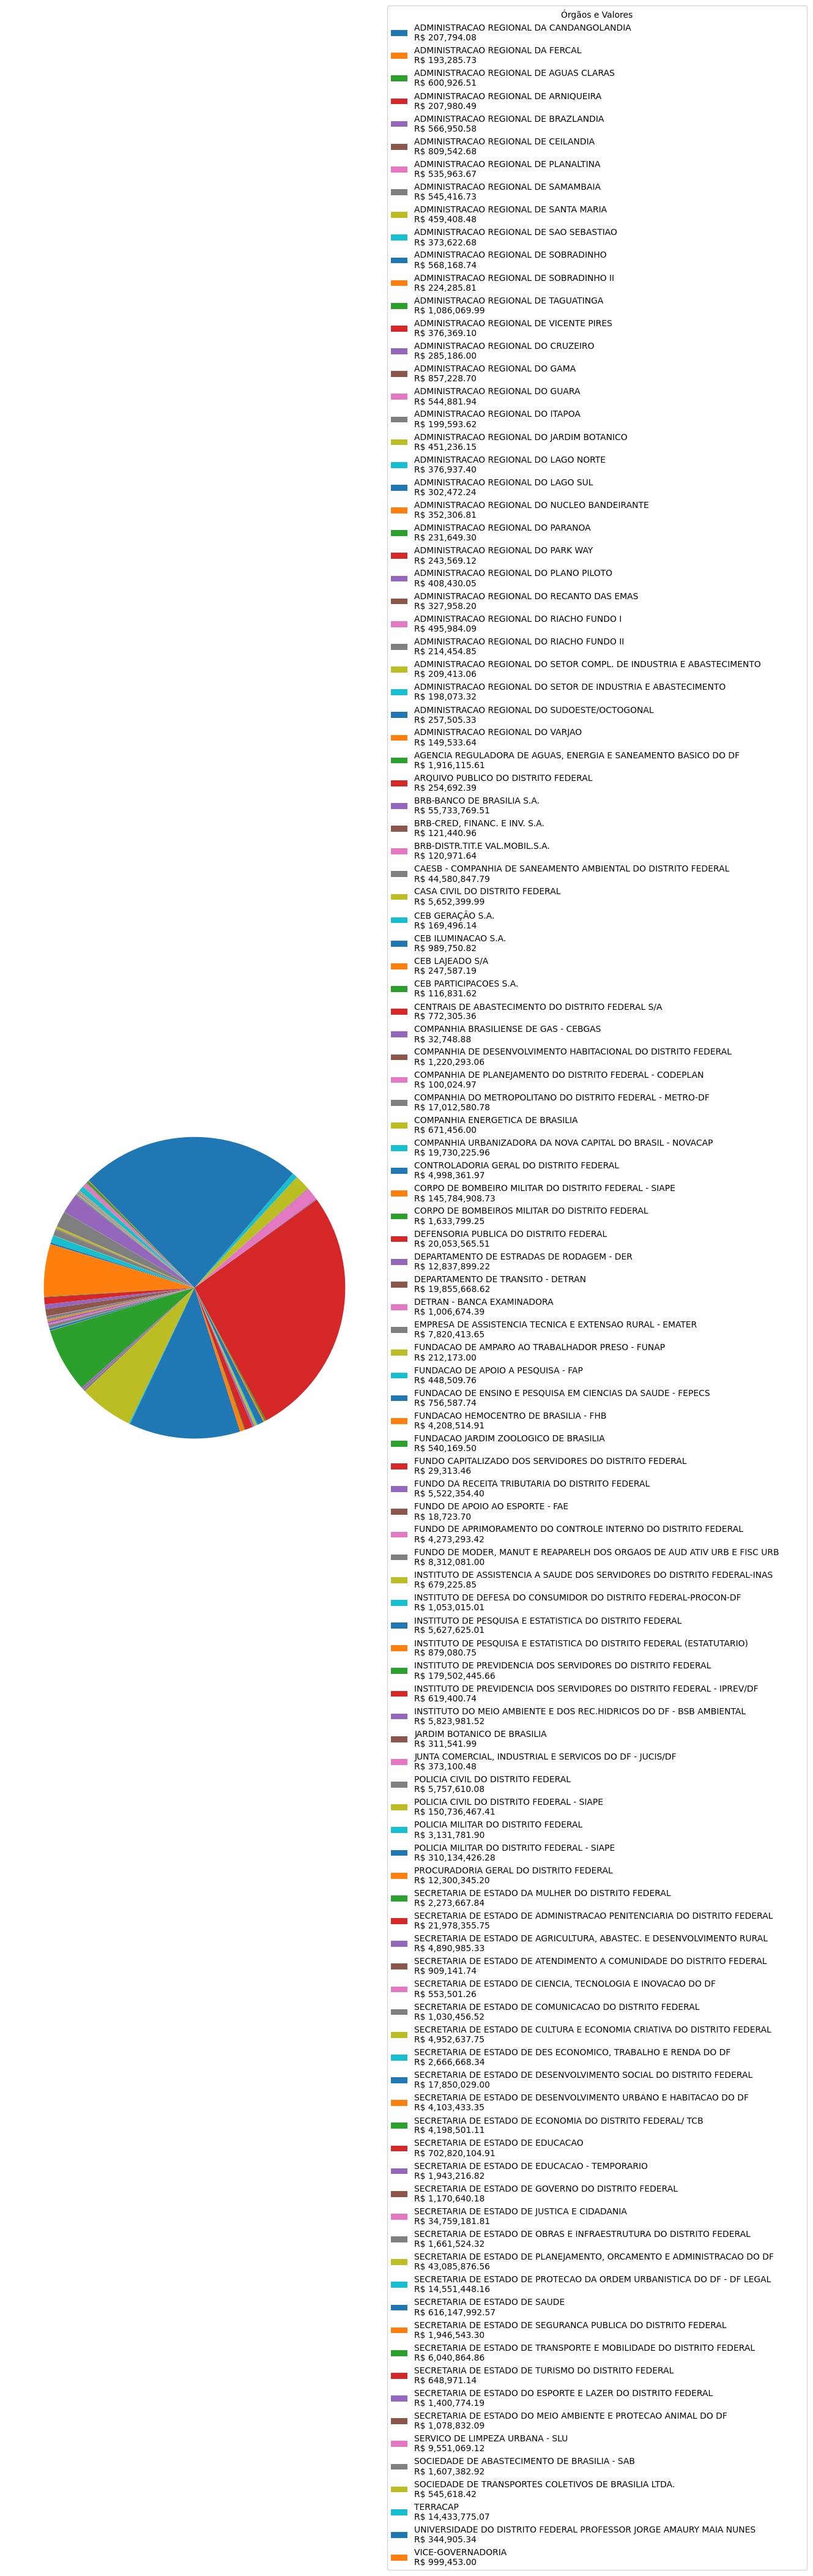

In [10]:
import matplotlib.pyplot as plt

remuneracao_por_orgao = df.groupby('ÓRGÃO')['BRUTO'].sum()

fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts = ax.pie(remuneracao_por_orgao, startangle=140)

legenda = [f"{orgao}\nR$ {valor:,.2f}" for orgao, valor in remuneracao_por_orgao.items()]

plt.legend(wedges, legenda, title="Órgãos e Valores", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

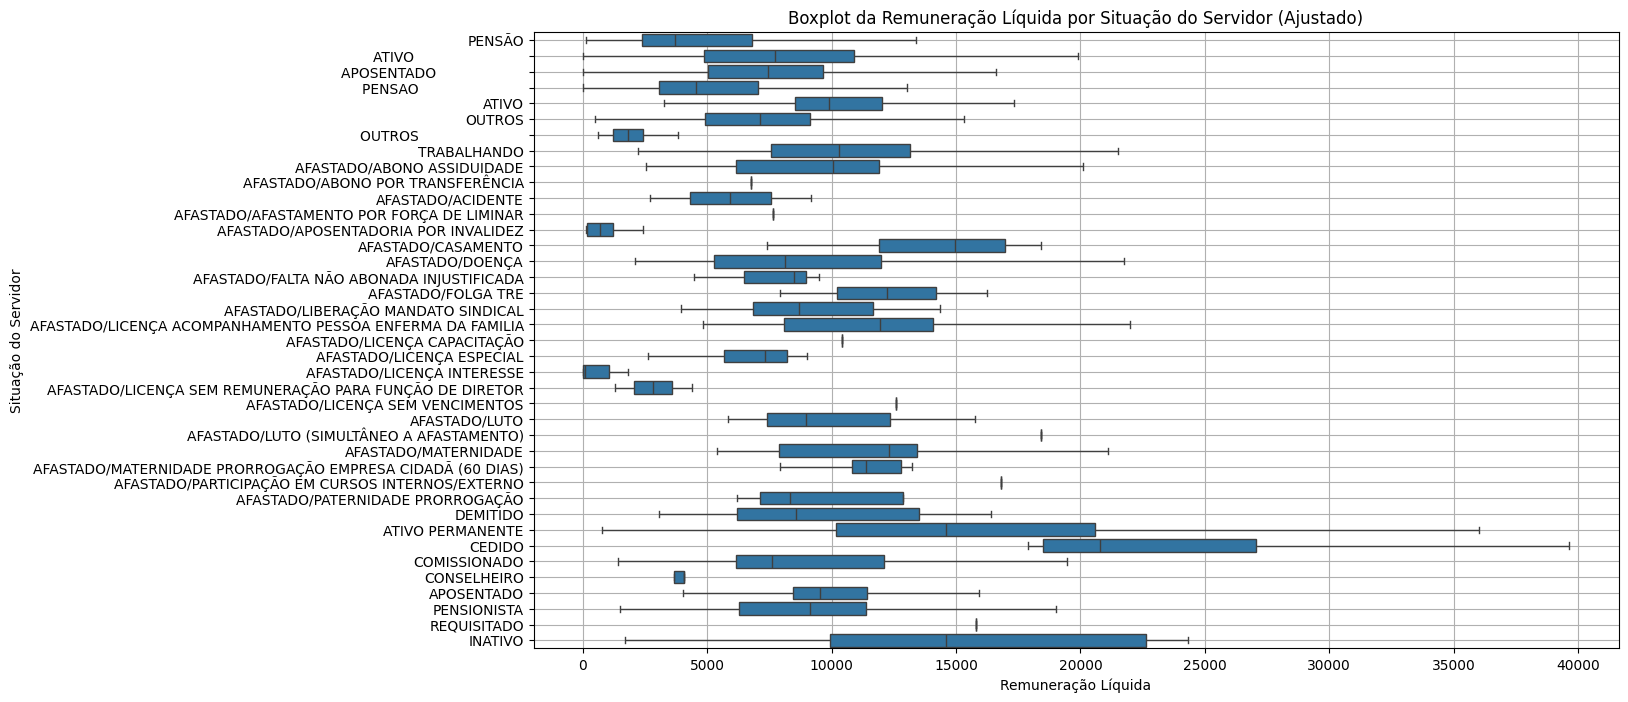

In [11]:
import seaborn as sns

file_path = "remuneracaoServidores.csv"

df = pd.read_csv(file_path, sep=None, engine='python')

cols_to_convert = ['REMUNERAÇÃO BÁSICA', 'BRUTO', 'LÍQUIDO', 'IRRF']
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False).astype(float)

espaco_amostral = len(df)

cols_to_convert = ["LÍQUIDO"]
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False).astype(float)

plt.show()

df_dispersion = df.groupby("ÓRGÃO")["LÍQUIDO"].agg(["mean", "std"]).reset_index()


df_dispersion["CV"] = df_dispersion["std"] / df_dispersion["mean"]

orgao_menor_variacao = df_dispersion.loc[df_dispersion["std"].idxmin(), "ÓRGÃO"]
orgao_menor_cv = df_dispersion.loc[df_dispersion["CV"].idxmin(), "ÓRGÃO"]

df_dispersion.sort_values(by="std", ascending=True).head(10)

df_limpo = df[df["LÍQUIDO"] > 0].copy()

plt.figure(figsize=(14, 8))
sns.boxplot(y=df_limpo["SITUAÇÃO"], x=df_limpo["LÍQUIDO"],orient="h", showfliers=False)

plt.title("Boxplot da Remuneração Líquida por Situação do Servidor (Ajustado)")
plt.xlabel("Remuneração Líquida")
plt.ylabel("Situação do Servidor")
plt.grid(True)

In [12]:
df['LÍQUIDO'] = pd.to_numeric(df['LÍQUIDO'])

desvio_padrao_por_orgao = df.groupby('ÓRGÃO')['LÍQUIDO'].std()

orgao_menos_variacao = desvio_padrao_por_orgao.idxmin()

print(f"Órgão com salário líquido de menor variação: {orgao_menos_variacao}")

Órgão com salário líquido de menor variação: FUNDO DE APOIO AO ESPORTE - FAE                                                 


In [ ]:
df['IRRF'] = pd.to_numeric(df['IRRF'])
df['LÍQUIDO'] = pd.to_numeric(df['LÍQUIDO'])
df['BRUTO'] = pd.to_numeric(df['BRUTO'])

correlacao_irrf_liquido = df['IRRF'].corr(df['LÍQUIDO'])

correlacao_irrf_bruto = df['IRRF'].corr(df['BRUTO'])

print(f"Correlação entre IRRF e salário líquido: {correlacao_irrf_liquido:.2f}")
print(f"Correlação entre IRRF e salário bruto: {correlacao_irrf_bruto:.2f}")

if abs(correlacao_irrf_liquido) > abs(correlacao_irrf_bruto):
    print("A correlação é maior entre IRRF e salário líquido.")
elif abs(correlacao_irrf_liquido) < abs(correlacao_irrf_bruto):
    print("A correlação é maior entre IRRF e salário bruto.")

Correlação entre IRRF e salário líquido: 0.74
Correlação entre IRRF e salário bruto: 0.85
A correlação é maior entre IRRF e salário bruto.


In [14]:
df['IRRF'] = pd.to_numeric(df['IRRF'])
df['LÍQUIDO'] = pd.to_numeric(df['LÍQUIDO'])
df['BRUTO'] = pd.to_numeric(df['BRUTO'])

df['DIFERENCA_SALARIAL'] = df['BRUTO'] - df['LÍQUIDO']

correlacao_irrf_diferenca = df['IRRF'].corr(df['DIFERENCA_SALARIAL'])
print(f"Correlação entre IRRF e diferença salarial: {correlacao_irrf_diferenca:.2f}")

def calcular_correlacao_segura(grupo):
    if len(grupo) >= 2 and grupo['IRRF'].var() > 0 and grupo['DIFERENCA_SALARIAL'].var() > 0:
        return grupo['IRRF'].corr(grupo['DIFERENCA_SALARIAL'])
    else:
        return None  
    
correlacao_por_orgao = df.groupby('ÓRGÃO').apply(calcular_correlacao_segura).dropna()

if not correlacao_por_orgao.empty:
    orgao_maior_correlacao = correlacao_por_orgao.idxmax()
    maior_correlacao = correlacao_por_orgao.max()
    print(f"Órgão com maior correlação entre IRRF e diferença salarial: {orgao_maior_correlacao}")
    print(f"Correlação: {maior_correlacao:.2f}")

Correlação entre IRRF e diferença salarial: 0.94
Órgão com maior correlação entre IRRF e diferença salarial: DETRAN - BANCA EXAMINADORA                                                      
Correlação: 1.00
